In [ ]:
import cv2
import numpy as np
import glob
import pickle
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split


In [ ]:
eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/ML final project/code/haarcascade_eye.xml')

# Load the CSV file containing image names and eye color labels
eye_color_df = pd.read_csv('eye_color_labels.csv')

# Create a dictionary mapping image names to eye color labels
eye_color_dict = dict(zip(eye_color_df['image_name'], eye_color_df['eye_color']))

# Initialize a list to store the new image names and their labels
final_iris_labels = []

def transform_image(img,threshold):

    if threshold == 0:
      _, threshold = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    else:
      retval, threshold = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)


    opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)
    close = closing

    open_close = cv2.bitwise_or(opening, closing, mask = None)

    return open_close,opening,close

imgs = []
label=0
final_output = []
lables = []
eye_detected_imgs=[]
iris_eye_detected_imgs=[]

path = "/content/drive/MyDrive/ML final project/datasets/CLASSES_400_300_Part2"


print(path)

for filepath in glob.iglob(path):

    num_in_folder= 0

    for filefilepath in glob.iglob(filepath+'/*'):
      #print(filefilepath[-1])
      while num_in_folder<100:
        if filefilepath[-1] == 'f':
            #print(filefilepath[-1])
            img	= cv2.imread(filefilepath)
            imgs_colored=cv2.imread(filefilepath)
            img=cv2.resize(img,(200,150))

            img	=	cv2.cvtColor(img,	cv2.COLOR_BGR2GRAY)
            imgs.append([img,num_in_folder,label,imgs_colored])
            num_in_folder = num_in_folder+1
    label=label+1


eyes_num=0


for i,j,L,c in imgs:

    i=cv2.resize(i,(400,400))

    eyes = eye_cascade.detectMultiScale(i, 1.01, 0)

    if len(eyes)>1:
        print(eyes_num)
        eye_detected_imgs.append(imgs[eyes_num])
        eyes_num = eyes_num+1

        maxium_area = -3

        for (ex,ey,ew,eh) in eyes:
            area = ew*eh

            if area>maxium_area:
                maxium_area = area
                maxium_width=ew
                point_x=ex
                point_y=ey
                maxium_height = eh

        #cv2.rectangle(c,(point_x,point_y),(point_x+maxium_width,+maxium_height),(255,0,0),2)

print("total_eyes_found = ",eyes_num)


print("total images number ",len(imgs))



/content/drive/MyDrive/ML final project/datasets/CLASSES_400_300_Part2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
total_eyes_found =  100
total images number  100


In [ ]:


# Extract features (images) and labels from eye_detected_imgs
X = [item[0] for item in eye_detected_imgs]  # Assuming image data is the first element of each tuple
y = [item[2] for item in eye_detected_imgs]  # Assuming labels are the third element of each tuple

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Normalize pixel values to a range [0-1]
X_train = X_train / 255.0
X_test = X_test / 255.0

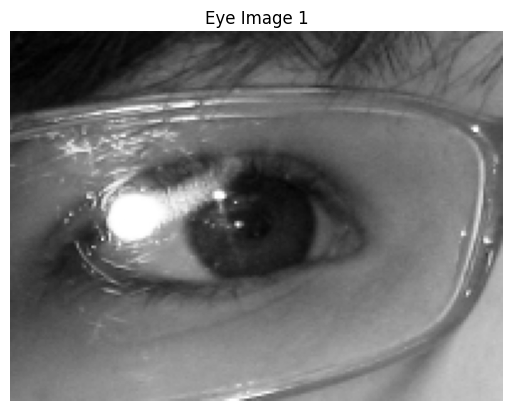

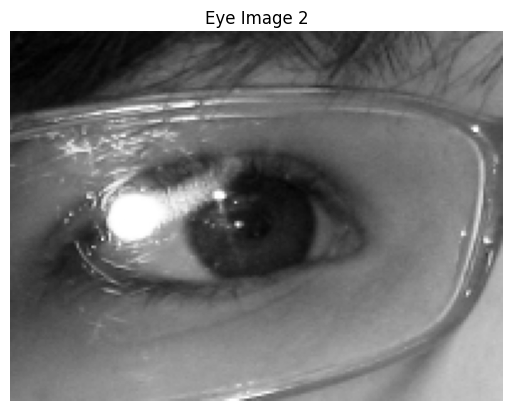

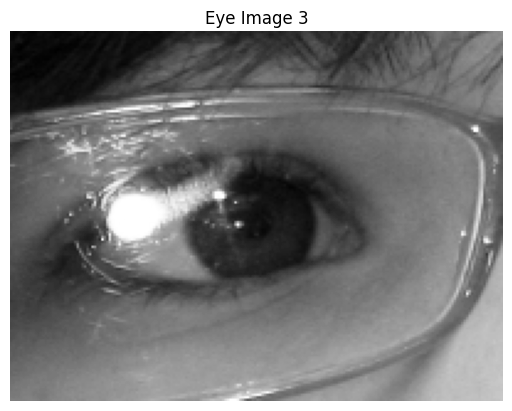

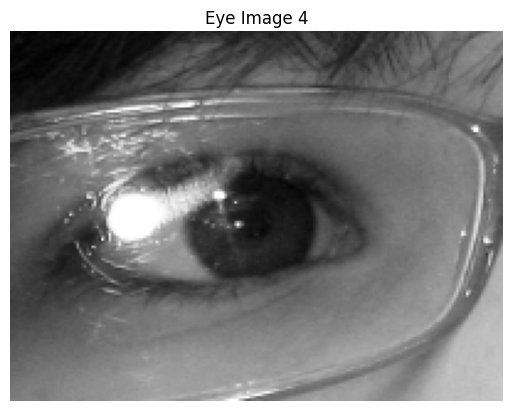

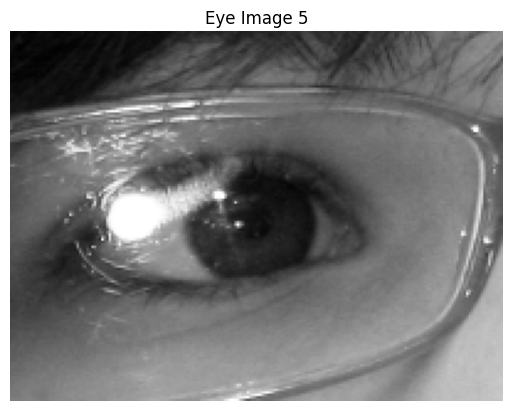

In [ ]:


def display_eye_images(eye_detected_imgs, num_images=5):
  """Displays a specified number of images from eye_detected_imgs.

  Args:
    eye_detected_imgs: The list of images containing eye detections.
    num_images: The number of images to display. Defaults to 5.
  """

  num_images = min(num_images, len(eye_detected_imgs))  # Ensure we don't try to display more images than available

  for i in range(num_images):
    image_data = eye_detected_imgs[i][0]  # Get the image data from the tuple
    # Assuming the image is grayscale, you can use 'gray' cmap, if it is a color image, use default cmap
    plt.imshow(image_data, cmap='gray')
    plt.title(f"Eye Image {i + 1}")
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()

# Call the function to display 5 images from eye_detected_imgs
display_eye_images(eye_detected_imgs, num_images=5)

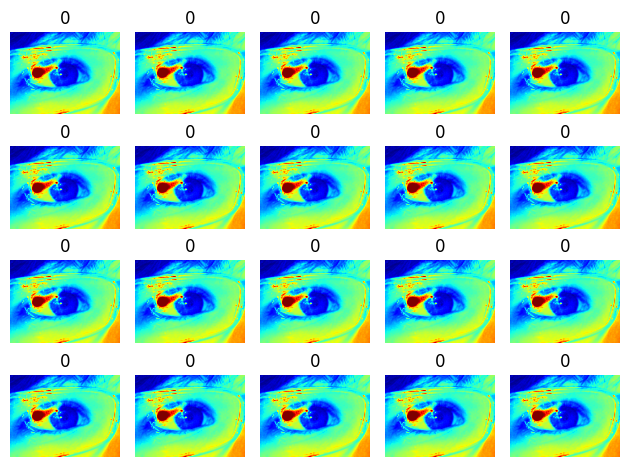

In [ ]:
def q1(X,y,n):
  #plt.figure(figsize=(10,8))
  randImages = np.random.choice(X.shape[0], n, replace=False)
  for i in range(n):
    plt.subplot(4,5,i+1)
    plt.imshow(X[randImages[i]].reshape(150, 200), cmap='jet')
    plt.title(y[randImages[i]])
    plt.axis('off')

  plt.tight_layout()
  plt.show()

q1(X_train,y_train,20)

In [ ]:
def plot_random_images_with_houghcircles(eye_detected_imgs):
    """
    Plots 20 random unique images from the given list, with the Hough circles detected.

    Parameters:
    eye_detected_imgs (list): List of tuples containing (image, label, image_path, original_image)

    Returns:
    None
    """
    # Select 20 random unique indices
    random_indices = np.random.choice(len(eye_detected_imgs), size=20, replace=False)

    # Create a figure with 4 rows and 5 columns
    fig, axes = plt.subplots(4, 5, figsize=(15, 12))

    for i, idx in enumerate(random_indices):
        img, label, img_path, original_img = eye_detected_imgs[idx]

        row = i // 5
        col = i % 5
        """
        # Detect circles using Hough Circles
        circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 10, 100)

        if circles is not None:
            circles = np.round(circles[0, :]).astype("int")

            # Draw the detected circles on the original image
            for (x, y, r) in circles:
                if x+r <= max(original_img.shape) and y+r <= max(original_img.shape) and x-r > 0 and y-r > 0 and r > 20:
                    original_img = cv2.circle(original_img, (x, y), r, (255, 255, 0), 4)
        """
        # Plot the image with the detected circles
        axes[row, col].imshow(original_img, cmap='gray')
        axes[row, col].set_title(f"Label: {label}")
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_random_images_with_houghcircles2(eye_detected_imgs):
    """
    Plots 20 random unique images from the given list, with the Hough circles detected.

    Parameters:
    eye_detected_imgs (list): List of tuples containing (image, label, image_path, original_image)

    Returns:
    None
    """

    num_images_to_plot = min(20, len(eye_detected_imgs))  # Ensure we don't try to plot more images than available

    # Select random unique indices without replacement
    random_indices = random.sample(range(len(eye_detected_imgs)), num_images_to_plot)

    # Create a figure with 4 rows and 5 columns
    fig, axes = plt.subplots(4, 5, figsize=(15, 12))

    for i, idx in enumerate(random_indices):
        img, label, img_path, original_img = eye_detected_imgs[idx]

        row = i // 5
        col = i % 5

        # Plot the image
        axes[row, col].imshow(original_img, cmap='gray')
        axes[row, col].set_title(f"Label: {label}")
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

total_iris_found =  100
total images number  100


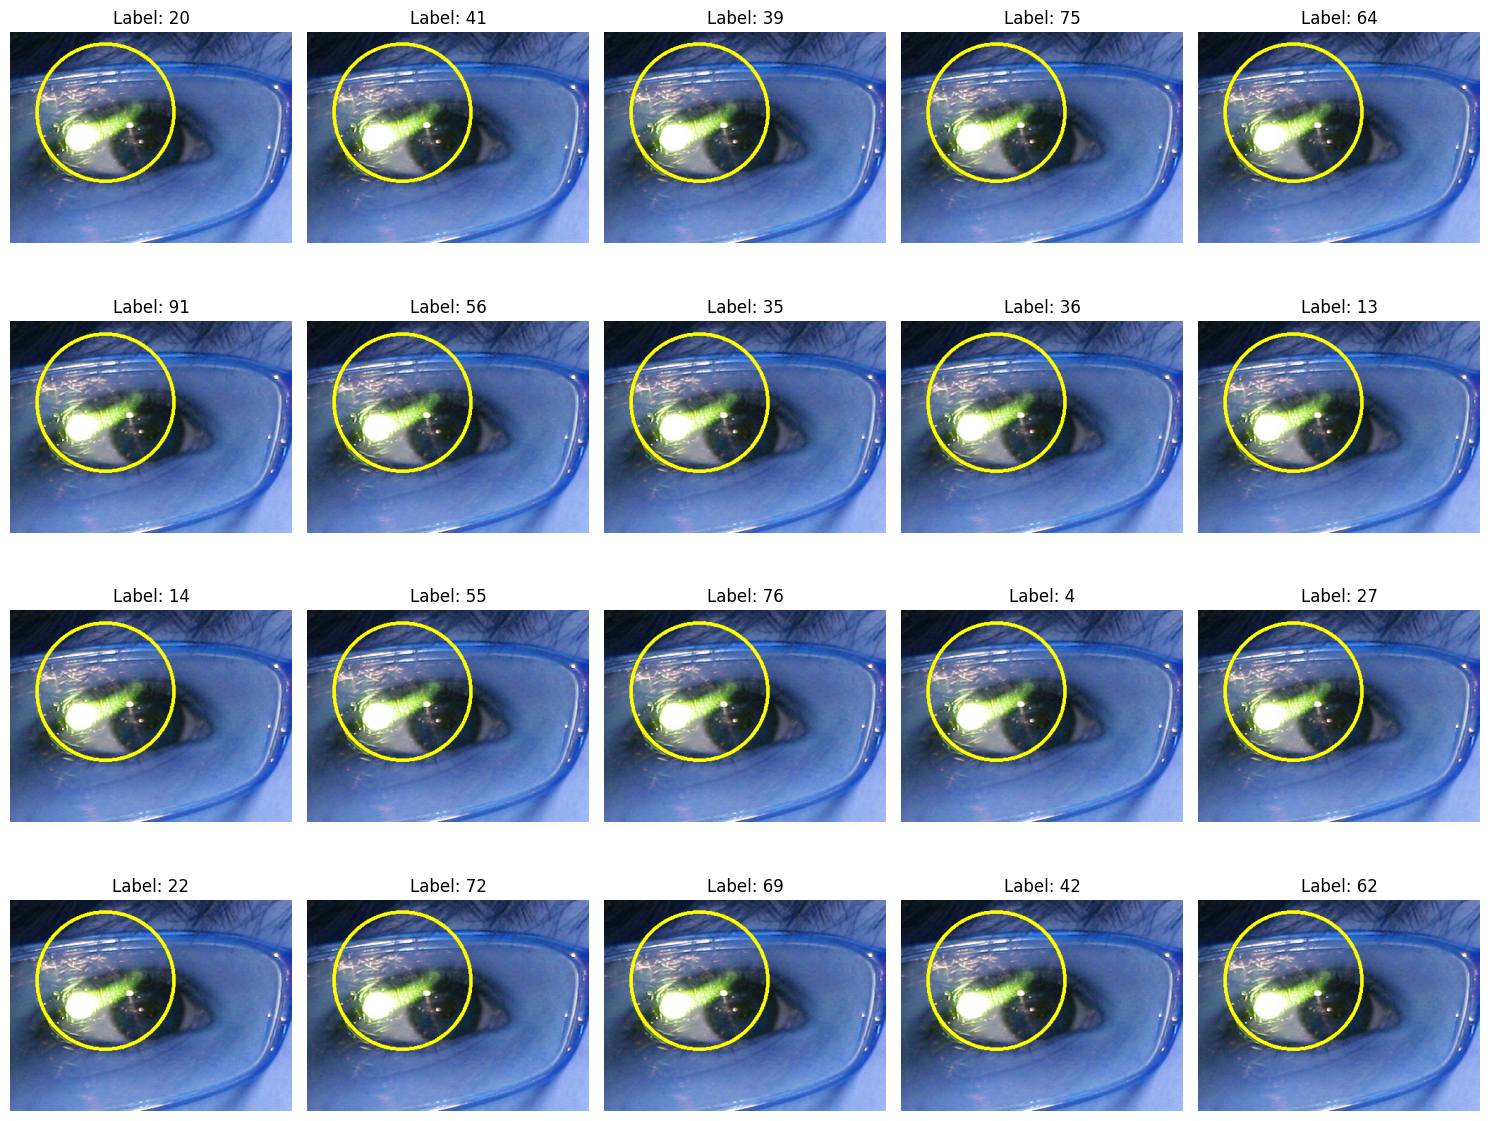

In [ ]:
iris_num=0
for i,j,L,c in eye_detected_imgs:


    circles = cv2.HoughCircles(i, cv2.HOUGH_GRADIENT, 10, 100)

    if circles is not None :

        circles = np.round(circles[0, :]).astype("int")
        #print(len(circles))
        #print(y)

        maxiumum_average=10000000000000
        #print(len(circles))
        #print(i.shape[0])
        #print(i.shape[1])
        #print(min(i.shape))

        key=True



        for (x, y, r) in circles:

            if x+r<=max(i.shape) and y+r<=max(i.shape)and x-r>0 and y-r>0 and r>20:

                key=False

                new_roi = i[y-r:y+r, x-r:x+r]
                average = np.average(new_roi)

                if average < maxiumum_average:
                    maxiumum_r = r
                    point_x=x
                    point_y=y
                    maxiumum_average=average


                #cv2.circle(i, (x, y), r, (0, 0, 0), 4)

        if key:
            #print("key opened")
            average = float('inf')
            for (x, y, r) in circles:


                    maxiumu_raduis=-4

                    if r > maxiumu_raduis:
                        maxiumum_r = r
                        point_x=x
                        point_y=y
                        maxiumum_average=average






        #cv2.circle(c, (point_x, point_y), maxiumum_r, (255, 255, 0), 4)
        #print(str(L)+'.'+str(j)+"  =  "+str(maxiumum_average)+"  "+str(r))

        #cv2.imwrite("/content/drive/MyDrive/ML final project/datasets/iris/"+str(L)+'.'+str(j)+'.jpg',c)
        iris_eye_detected_imgs.append(eye_detected_imgs[iris_num])
        iris_num = iris_num+1


            #roi_gray = gray[y:y+h, x:x+w]
            #roi_gray = gray[ey:ey+eh, ex:ex+ew]
            #roi_color = img[ey:ey+eh, ex:ex+ew]


print("total_iris_found = ",iris_num)


print("total images number ",len(imgs))

plot_random_images_with_houghcircles2(eye_detected_imgs)


In [ ]:


imgs = iris_eye_detected_imgs




kernel = np.ones((5,5),np.uint8)
import random

random.shuffle(imgs)

test=[]
for i,j,L,c in imgs:

    gold,siver,diamond = transform_image(i,0)
    golden_refrence = sum(sum(gold))
    #print("golden refrence  = "+str(golden_refrence))

    for k in range(10,1000,10):

        #potential fix: dynamic threshold
        #_, working_img = cv2.threshold(i, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


        working_img,opening,closing = transform_image(i,k)
        suming = sum(sum(working_img))
        diffrence = suming-golden_refrence

        if diffrence>800:
            print("the image threshold = " ,k)
            print("the image name " +str(j))
            print(" " )



            cv2.imwrite("/content/drive/MyDrive/ML final project/datasets/threshold/"+str(L)+'.'+str(j)+'.jpg',working_img)
            cv2.imwrite("/content/drive/MyDrive/ML final project/datasets/opening/"+str(L)+'.'+str(j)+'.jpg',opening)
            cv2.imwrite("/content/drive/MyDrive/ML final project/datasets/closing/"+str(L)+'.'+str(j)+'.jpg',closing)




            #_, contours,_ = cv2.findContours(working_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
            contours, _ = cv2.findContours(working_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

            for z in contours:

                x,y,w,h = cv2.boundingRect(z)
                if x+w<150 and y+h<200 and x-w//4>0:

                    cv2.rectangle(working_img,(x,y),(x+w,y+h),(0,255,0),-2)
                    cv2.imwrite("/content/drive/MyDrive/ML final project/datasets/contour/"+str(L)+'.'+str(j)+'.jpg',working_img)


            contours_2,_ = cv2.findContours(working_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

            #cv2.imwrite('paper/contour/'+str(L)+'.'+str(j)+'.jpg',contours_2)


            maxium_area=0
            maxium_area = 0
            maxium_width=0
            point_x=0
            point_y=0
            maxium_height = 0
            for z in contours_2:
                #print(len(i))
                x,y,w,h = cv2.boundingRect(z)
                new_area=h*w
                if x+w<150 and y+h<200 and new_area>maxium_area and x-w//4>0:
                    maxium_area = new_area
                    maxium_width=w
                    point_x=x
                    point_y=y
                    maxium_height = h


                    #cv2.rectangle(working_img,(x,y),(x+w,y+h),(0,255,0),-2)

            #cv2.rectangle(i,(point_x,point_y),(point_x+maxium_width,point_y+maxium_height),(0,255,0),-2)

            center_x = point_x+maxium_width//2
            center_y = point_y+maxium_height//2
            radius = 40

            if center_y-radius>0 and center_x-radius >0  and center_y+radius < 200 and center_x+radius < 150:
                #cv2.circle(c, (int(center_x), int(center_y)), int(radius),  (0, 255, 255), 2)
                new_roi = c[center_y-radius:center_y+radius, center_x-radius:center_x+radius]
                new_roi=cv2.resize(new_roi,(200,150))
                #new_roi	= cv2.cvtColor(new_roi,cv2.COLOR_GRAY2BGR)

                #cv2.imwrite('paper/threshold/'+str(L)+'.'+str(j)+'.jpg',new_roi)
                cv2.imwrite("/content/drive/MyDrive/ML final project/datasets/final_iris/"+str(L)+'.'+str(j)+'.jpg',new_roi)

            #new_roi=cv2.resize(new_roi,(200,150))
            else:
                center_y=c.shape[0]//2
                center_x=c.shape[1]//2
                new_roi = c[center_y-radius:center_y+radius, center_x-radius:center_x+radius]
                new_roi =cv2.resize(new_roi,(200,150))
                #new_roi = cv2.cvtColor(new_roi,cv2.COLOR_GRAY2BGR)

                cv2.imwrite("/content/drive/MyDrive/ML final project/datasets/final_iris/"+str(L)+'.'+str(j)+'.jpg',new_roi)
            # Get the original image name from the file path
            original_image_name = filefilepath.split('/')[-1]

            # Get the eye color label from the dictionary using the original image name
            eye_color_label = eye_color_dict.get(original_image_name)

            if eye_color_label is not None:
                new_image_name = str(L) + '.' + str(j) + '.jpg'  # Assuming your naming convention
                final_iris_labels.append([new_image_name, eye_color_label])

            cv2.imwrite("/content/drive/MyDrive/ML final project/datasets/edging_5/"+str(L)+'_'+str(j)+'.jpg',i)
            test.append(i)
            final_output.append(new_roi)
            lables.append(L)



            #cv2.imwrite('edging_5_test/'+str(j[5:]),i)

            break

# Create a DataFrame from the final_iris_labels list
final_iris_labels_df = pd.DataFrame(final_iris_labels, columns=['image_name', 'eye_color'])

# Write the DataFrame to a CSV file
final_iris_labels_df.to_csv('final_iris_labels.csv', index=False)

print("the lenght of final output = ",len(final_output))
print("the of lables = ",len(lables))

final_output=np.array(final_output)
print(final_output.shape)

test=np.array(test)
print(test.shape)

pickle_out = open("test_ubiris.pickle","wb")
pickle.dump(test, pickle_out)
pickle_out.close()

pickle_out = open("ubiris_features.pickle","wb")
pickle.dump(final_output, pickle_out)
pickle_out.close()

pickle_out = open("ubiris_lables.pickle","wb")
pickle.dump(lables, pickle_out)
pickle_out.close()

the image threshold =  30
the image name 0
 
the lenght of final output =  1
the of lables =  1
(1, 150, 200, 3)
(1, 150, 200)
